In [1]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import knn

In [2]:
data = load_iris()
X, y = data.data, data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

non fixed bandwidth: 0.5099019513592785
non fixed bandwidth: 0.5477225575051664
non fixed bandwidth: 0.3162277660168377
non fixed bandwidth: 0.2999999999999998
non fixed bandwidth: 0.22360679774997827
non fixed bandwidth: 0.3741657386773942
non fixed bandwidth: 0.3464101615137753
non fixed bandwidth: 0.14142135623730995
non fixed bandwidth: 0.1414213562373093
non fixed bandwidth: 0.3464101615137755
non fixed bandwidth: 0.26457513110645897
non fixed bandwidth: 0.4582575694955842
non fixed bandwidth: 0.31622776601683783
non fixed bandwidth: 0.36055512754639896
non fixed bandwidth: 0.2828427124746193
non fixed bandwidth: 0.3464101615137758
non fixed bandwidth: 0.3605551275463984
non fixed bandwidth: 0.24494897427831802
non fixed bandwidth: 0.24494897427831722
non fixed bandwidth: 0.7071067811865474
non fixed bandwidth: 0.14142135623730995
non fixed bandwidth: 0.5291502622129179
non fixed bandwidth: 0.3872983346207417
non fixed bandwidth: 0.1414213562373093
non fixed bandwidth: 0.608276253

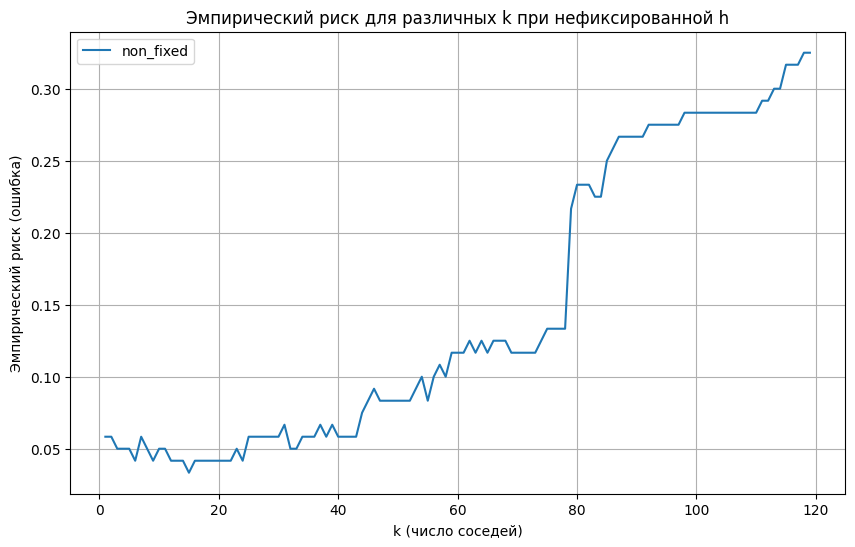

In [3]:
h_values = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 2.0]  # Различные значения h для анализа
min_risk = len(X)
best_k = 1
bandwidth = None
# Построение графиков
plt.figure(figsize=(10, 6))

if bandwidth is not None:
    for h in h_values:
        besk_k_h, risks = knn.loo_knn_parzen(X_train, y_train, bandwidth=bandwidth)
        if min(risks) < min_risk:
            bandwidth = h
            min_risk = min(risks)
            best_k = besk_k_h
        plt.plot(range(1, len(risks) + 1), risks, label=f"h = {h}")
else:
    best_k, risks = knn.loo_knn_parzen(X_train, y_train, bandwidth=bandwidth)
    plt.plot(range(1, len(risks) + 1), risks, label=f"non_fixed")

print(f"Best bandwidth: {bandwidth}, Min LOO risk: {min_risk:4f}")
print(f"Best k: {best_k} for bandwidth: {bandwidth}")
plt.xlabel("k (число соседей)")
plt.ylabel("Эмпирический риск (ошибка)")
plt.title("Эмпирический риск для различных k при нефиксированной h")
plt.legend()
plt.grid()
plt.show()

In [4]:
# Предсказание с оптимальным k
start_time = time.time()
y_pred = knn.knn_parzen(X_train, y_train, X_test, best_k, bandwidth)
end_time = time.time()
test_accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred, target_names=data.target_names)
print(f"Test Accuracy: {test_accuracy}")
print(f"Время работы алгоритма: {end_time - start_time:.4f} секунд")
print("Отчет о классификации:")
print(report)

non fixed bandwidth: 0.6480740698407862
Test Accuracy: 1.0
Время работы алгоритма: 0.0010 секунд
Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [5]:
# Инициализируем KNN
knn = KNeighborsClassifier(n_neighbors=best_k)

# Засекаем время работы
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

# Делаем предсказания
y_pred = knn.predict(X_test)

# Оцениваем метрики
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)

# Выводим результаты
print(f"Время работы алгоритма: {end_time - start_time:.4f} секунд")
print(f"Точность: {accuracy:.4f}")
print("Отчет о классификации:")
print(report)


Время работы алгоритма: 0.0020 секунд
Точность: 1.0000
Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

